<a href="https://colab.research.google.com/github/tlkt/fast_lesson_work/blob/master/lession_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from fastai.vision import *

In [0]:
#下载图片 

In [0]:
folders = [{'name':'black','file':'urls_black.csv'},{'name':'teddys','file':'urls_teddys.csv'},{'name':'grizzly','file':'urls_grizzly.csv'}]

In [4]:
base_path = 'drive/My Drive/data/lession2/'
for i in folders:
  file_path = Path(base_path+i['file'])
  path = Path(base_path+i['name'])
  dest = path
  dest.mkdir(parents=True,exist_ok=True)
  download_images(file_path,dest,max_pics=200)

Error https://ww.mtpr.org/sites/kufm/files/styles/medium/public/201906/grizzly-killed-05-30-19_MontanaFWP.jpg HTTPSConnectionPool(host='ww.mtpr.org', port=443): Max retries exceeded with url: /sites/kufm/files/styles/medium/public/201906/grizzly-killed-05-30-19_MontanaFWP.jpg (Caused by SSLError(CertificateError("hostname 'ww.mtpr.org' doesn't match either of '*.drupal.publicbroadcasting.net', 'drupal.publicbroadcasting.net'",),))
Error https://www.nationalgeographic.com/content/dam/yourshot/2014/02/3061806.jpg HTTPSConnectionPool(host='www.nationalgeographic.com', port=443): Read timed out. (read timeout=4)
Error https://www.washingtonpost.com/resizer/fgjFip1l9cKPBwJK3cxC9o9dlMI=/767x0/smart/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/XK6YBT5GSE2LROLN3FO4WRK5JI.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error https://ww.mtpr.org/sites/kufm/files/styles/medium/public/201906/grizzly-killed-05-30-19_MontanaFWP.jpg 

Error https://www.giantteddy.com/product_images/uploaded_images/personalized.jpg HTTPSConnectionPool(host='www.giantteddy.com', port=443): Max retries exceeded with url: /product_images/uploaded_images/personalized.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:852)'),))


KeyboardInterrupt: ignored

In [8]:
# 清洗图片
for i in folders:
  path = Path(base_path+i['name'])
  verify_images(path,delete=True,max_size=500)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:1044: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry for transparency")


cannot identify image file <_io.BufferedReader name='drive/My Drive/data/lession2/black/00000041.jpg'>
cannot identify image file <_io.BufferedReader name='drive/My Drive/data/lession2/black/00000054.jpg'>
cannot identify image file <_io.BufferedReader name='drive/My Drive/data/lession2/black/00000099.jpg'>


cannot identify image file <_io.BufferedReader name='drive/My Drive/data/lession2/teddys/00000156.jpg'>
tuple index out of range
cannot identify image file <_io.BufferedReader name='drive/My Drive/data/lession2/teddys/00000168.jpg'>
cannot identify image file <_io.BufferedReader name='drive/My Drive/data/lession2/teddys/00000105.jpg'>
cannot identify image file <_io.BufferedReader name='drive/My Drive/data/lession2/teddys/00000148.jpg'>
cannot identify image file <_io.BufferedReader name='drive/My Drive/data/lession2/teddys/00000134.jpg'>
cannot identify image file <_io.BufferedReader name='drive/My Drive/data/lession2/teddys/00000107.png'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


cannot identify image file <_io.BufferedReader name='drive/My Drive/data/lession2/teddys/00000090.jpg'>
cannot identify image file <_io.BufferedReader name='drive/My Drive/data/lession2/teddys/00000199.jpg'>


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(base_path,train='.',valid_pct=0.2,ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)

In [10]:
data.classes

['black', 'grizzly', 'teddys']

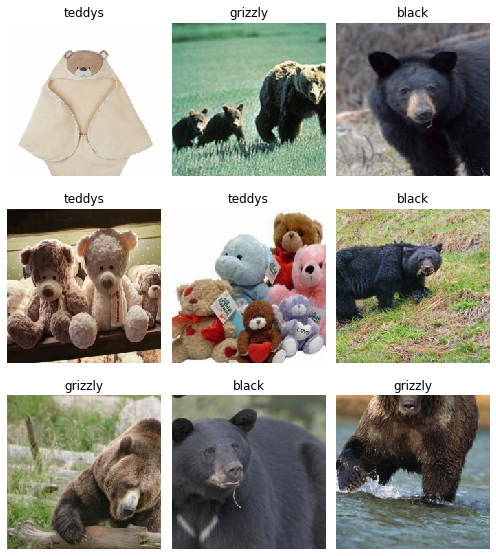

In [11]:
data.show_batch(rows=3,figsize=(7,8))

In [12]:
data.classes,data.c,len(data.train_ds),len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 455, 113)

In [0]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate)

In [14]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.231447,0.147180,0.035398,00:07
1,0.677101,0.167496,0.017699,00:07
2,0.477051,0.168926,0.026549,00:07
3,0.384169,0.149800,0.026549,00:07


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


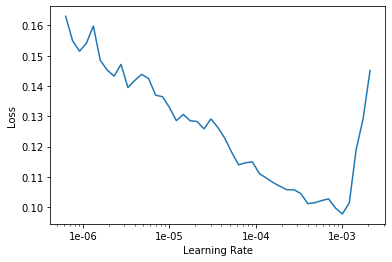

In [18]:
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.190796,0.165476,0.017699,00:07
1,0.147467,0.156492,0.017699,00:07


In [0]:
learn.save('stage-2')

In [21]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (455 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,black,black,black,black
Path: drive/My Drive/data/lession2;

Valid: LabelList (113 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
teddys,black,black,teddys,grizzly
Path: drive/My Drive/data/lession2;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05,

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

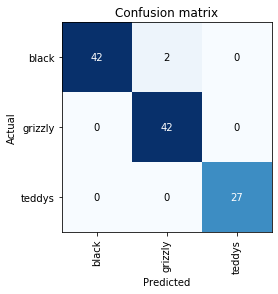

In [23]:
interp.plot_confusion_matrix()

In [24]:
doc(interp.plot_top_losses)

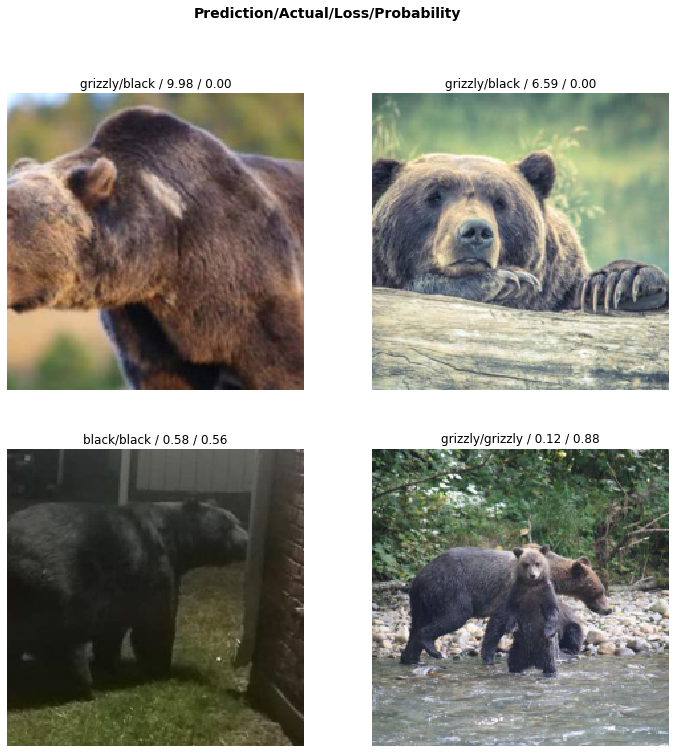

In [25]:
interp.plot_top_losses(4)

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(Path(base_path)).no_split().label_from_folder().transform(get_transforms(),size=224).databunch())

In [0]:
learn_cln = cnn_learner(db,models.resnet34,metrics=error_rate)
learn_cln.load('stage-2')

In [0]:
ds,idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
ImageCleaner(ds,idxs,path)

In [26]:
learn.export

<bound method Learner.export of Learner(data=ImageDataBunch;

Train: LabelList (455 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,black,black,black,black
Path: drive/My Drive/data/lession2;

Valid: LabelList (113 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
teddys,black,black,teddys,grizzly
Path: drive/My Drive/data/lession2;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (

In [0]:
learn.export()

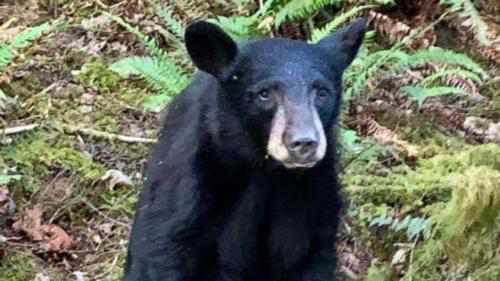

In [29]:
img = open_image(Path(base_path)/'black'/'00000029.jpg')
img

In [0]:
learn = load_learner(Path(base_path))

In [31]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category black

In [0]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate)

In [33]:
learn.fit_one_cycle(1,max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,19.844187,2687170816.000000,0.628319,00:06


In [34]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate)
learn.fit_one_cycle(5,max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,1.995427,1.418216,0.584071,00:07
1,2.006607,1.246634,0.601770,00:07
2,1.983639,1.186910,0.592920,00:06
3,1.963609,1.176123,0.610619,00:06
4,1.903657,1.176019,0.610619,00:07


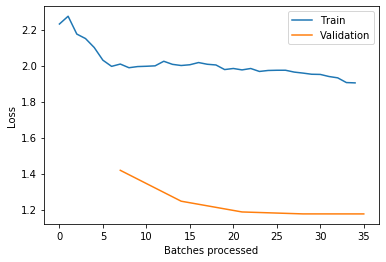

In [35]:
learn.recorder.plot_losses()

In [36]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate,pretrained=False)
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.552915,1.253555,0.504425,00:07


In [0]:
np.random.seed(42)

In [0]:
data = ImageDataBunch.from_folder(Path(base_path),train='.',valid_pct=0.9,bs=32,ds_tfms=get_transforms(
    do_flip=False,max_rotate=0,max_zoom=1,max_lighting=0,max_warp=0
),size=224,num_workers=4).normalize(imagenet_stats)

In [39]:
learn = cnn_learner(data,models.resnet50,metrics=error_rate,ps=0,wd=0)
learn.unfreeze()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 305MB/s]


In [40]:
learn.fit_one_cycle(40,slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.884748,2.123792,0.673190,00:07
1,1.681334,1.840690,0.673190,00:05
2,1.700516,1.626362,0.661448,00:05
3,1.610918,1.449899,0.636008,00:05
4,1.494613,1.247227,0.600783,00:05
5,1.393755,1.059681,0.551859,00:05
6,1.326321,0.888458,0.442270,00:05
7,1.271042,0.725700,0.352250,00:05
8,1.174262,0.582742,0.264188,00:05
9,1.080127,0.479406,0.201566,00:05
